In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Binance
url = ("https://api.binance.com/api/v3/depth")
params = {
    "symbol": "BTCUSDT",
    "limit": 50
}

data = requests.get(url, params=params).json()
bid = pd.DataFrame(data["bids"], columns=["Price", "Quantity"])
bid['Type'] = 'Bid'
ask = pd.DataFrame(data["asks"], columns=["Price", "Quantity"])
ask['Type'] = 'Ask'
df = pd.concat([bid, ask])
df = df.reset_index(drop=True)
df



,Price,Quantity,Type
0,60174.39000000,1.47467000,Bid
1,60174.38000000,0.01150000,Bid
2,60174.37000000,0.00009000,Bid
3,60174.18000000,0.00499000,Bid
4,60174.17000000,0.00009000,Bid
...,...,...,...
95,60185.31000000,0.66442000,Ask
96,60185.36000000,0.00013000,Ask
97,60185.58000000,0.00049000,Ask
98,60185.60000000,0.00049000,Ask


In [5]:
quotes = pd.read_csv('data/1000beerusdt_20240614/quotes.csv')
trades = pd.read_csv('data/1000beerusdt_20240614/trades.csv')

In [6]:
# Convert timestamp from epoch to datetime
quotes['timestamp'] = pd.to_datetime(quotes['timestamp'], unit='us')
quotes['local_timestamp'] = pd.to_datetime(quotes['local_timestamp'], unit='us')
trades['timestamp'] = pd.to_datetime(trades['timestamp'], unit='us')
trades['local_timestamp'] = pd.to_datetime(trades['local_timestamp'], unit='us')
# Quotes has ask_amount, ask_price, bid_amount, bid_price
# trades has side, price, and amount
quotes

,exchange,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount
0,bybit,1000BEERUSDT,2024-06-13 23:59:59.545,2024-06-14 00:00:00.210687,242,0.28787,0.28771,300
1,bybit,1000BEERUSDT,2024-06-13 23:59:59.564,2024-06-14 00:00:00.210898,205,0.28787,0.28771,300
2,bybit,1000BEERUSDT,2024-06-13 23:59:59.603,2024-06-14 00:00:00.210906,174,0.28772,0.28771,300
3,bybit,1000BEERUSDT,2024-06-13 23:59:59.624,2024-06-14 00:00:00.210912,174,0.28772,0.28771,230
4,bybit,1000BEERUSDT,2024-06-13 23:59:59.704,2024-06-14 00:00:00.210921,239,0.28772,0.28771,230
...,...,...,...,...,...,...,...,...
798812,bybit,1000BEERUSDT,2024-06-14 23:59:58.144,2024-06-14 23:59:58.181581,544,0.24058,0.24056,208
798813,bybit,1000BEERUSDT,2024-06-14 23:59:58.163,2024-06-14 23:59:58.201177,703,0.24057,0.24056,208
798814,bybit,1000BEERUSDT,2024-06-14 23:59:59.063,2024-06-14 23:59:59.101192,544,0.24058,0.24056,208
798815,bybit,1000BEERUSDT,2024-06-14 23:59:59.084,2024-06-14 23:59:59.121516,708,0.24057,0.24056,208


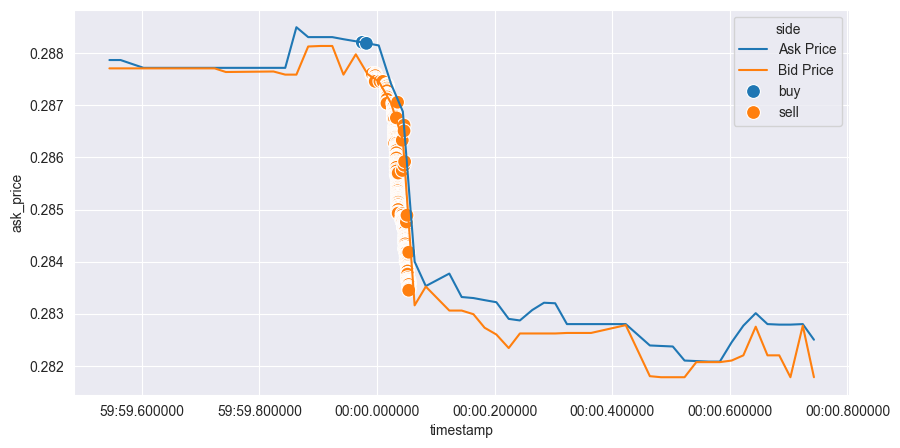

In [7]:
# Plot bid and ask prices and each trade executed
# Only plot the first 1000 quotes and trades
# Color the trades by side
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x='timestamp', y='ask_price', data=quotes.head(50), ax=ax, label='Ask Price')
sns.lineplot(x='timestamp', y='bid_price', data=quotes.head(50), ax=ax, label='Bid Price')
sns.scatterplot(x='timestamp', y='price', data=trades.head(500), ax=ax, hue='side', s=100)
plt.show()

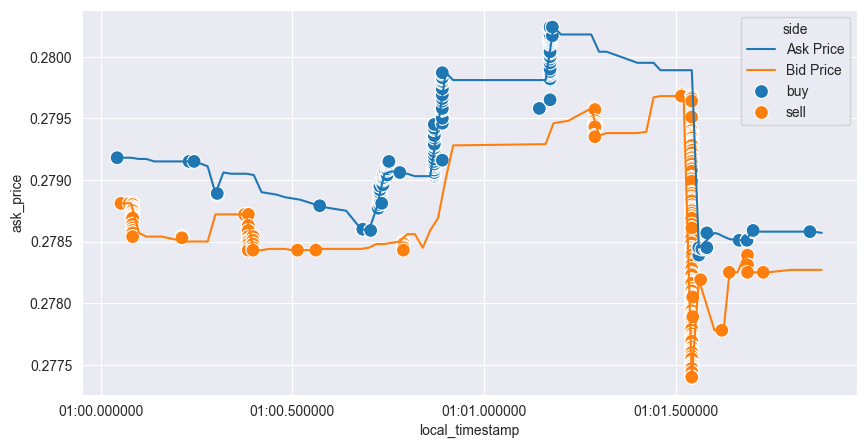

In [8]:
# Plot bid and ask prices and each trade executed
# Only plot the first 10 minutes of quotes and trades from local_timestamp
# Color the trades by side
def plot_quotes_trades(plot_quotes, plot_trades, time_start, duration):
    # Cut to time_start
    time_start = pd.to_datetime(time_start)
    time_end = time_start + pd.Timedelta(seconds=duration)
    
    plot_quotes = plot_quotes[(plot_quotes['local_timestamp'] >= time_start) & (plot_quotes['local_timestamp'] <= time_end)]
    plot_trades = plot_trades[(plot_trades['local_timestamp'] >= time_start) & (plot_trades['local_timestamp'] <= time_end)]

    # Plot bid and ask prices and each trade executed
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(x='local_timestamp', y='ask_price', data=plot_quotes, ax=ax, label='Ask Price')
    sns.lineplot(x='local_timestamp', y='bid_price', data=plot_quotes, ax=ax, label='Bid Price')
    sns.scatterplot(x='local_timestamp', y='price', data=plot_trades, ax=ax, hue='side', s=100)
    plt.show()
    
plot_quotes_trades(quotes, trades, '2024-06-14 00:01:00', 2)